# **K-Nearest Neighbors (K-NN)**

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

**Importing the dataset**

In [2]:
dataset = pd.read_csv('Student Mental Health.csv')

In [3]:
X = dataset.iloc[:, 1:-1].values  
y = dataset.iloc[:, -1].values  

In [4]:
dataset.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Timestamp                                     101 non-null    object
 1   Choose your gender                            101 non-null    object
 2   Age                                           101 non-null    int64 
 3   What is your course?                          101 non-null    object
 4   Your current year of Study                    101 non-null    object
 5   What is your CGPA?                            101 non-null    object
 6   Marital status                                101 non-null    object
 7   Do you have Depression?                       101 non-null    object
 8   Do you have Anxiety?                          101 non-null    object
 9   Do you have Panic attack?                     101 non-null    object
 10  Di

In [6]:
# periksa nilai yang hilang di setiap kolom
print(dataset.isnull().sum())

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


**Encoding data kategori**

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), list(range(0,9)))], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[1. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


**Encoding data kategori (Label)**

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Timestamp                                     101 non-null    object
 1   Choose your gender                            101 non-null    object
 2   Age                                           101 non-null    int64 
 3   What is your course?                          101 non-null    object
 4   Your current year of Study                    101 non-null    object
 5   What is your CGPA?                            101 non-null    object
 6   Marital status                                101 non-null    object
 7   Do you have Depression?                       101 non-null    object
 8   Do you have Anxiety?                          101 non-null    object
 9   Do you have Panic attack?                     101 non-null    object
 10  Di

**Splitting the dataset into the Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

**Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the K-NN model on the Training set**

**Finding the best value for k**

In [15]:
from sklearn.metrics import accuracy_score
k_range = range(1,30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

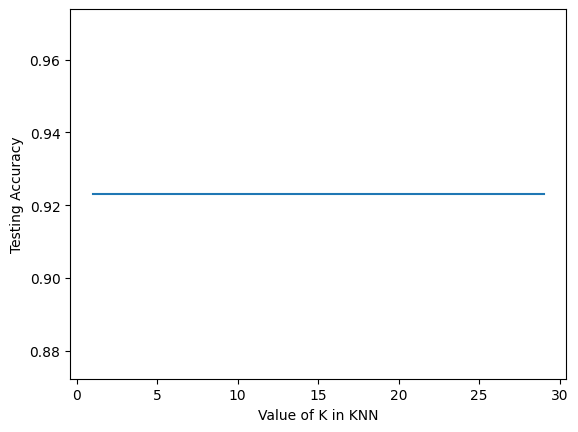

In [16]:
plt.xlabel("Value of K in KNN")
plt.ylabel("Testing Accuracy")
plt.plot(k_range,scores)

In [17]:
optimal_k = k_range[np.argmax(scores)]
print(f"Optimal K: {optimal_k}")

Optimal K: 1


In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9231


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[24  0]
 [ 2  0]]


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

In [22]:
# Menampilkan koefisien komponen utama
print("Koefisien Komponen PCA (Loading Scores):")
for i, component in enumerate(pca.components_):
    print(f"Komponen {i+1}:")
    for feature, score in zip(dataset.columns[:-1], component):  
        print(f"{feature}: {score}")
    print("\n")

Koefisien Komponen PCA (Loading Scores):
Komponen 1:
Timestamp: 0.1120285789046828
Choose your gender: -0.11202857890468285
Age: -0.1068764201291196
What is your course?: 0.027397027212206326
Your current year of Study: 0.08081522704099564
What is your CGPA?: -0.04725662666264563
Marital status: 0.022827064210018233
Do you have Depression?: 0.07659696899764235
Do you have Anxiety?: 0.02305957832177944
Do you have Panic attack?: -0.06811602202094517


Komponen 2:
Timestamp: -0.31990487924807076
Choose your gender: 0.3199048792480709
Age: -0.09271891227427598
What is your course?: 0.08546159622271146
Your current year of Study: 0.19656301380663316
What is your CGPA?: 0.11588402729436703
Marital status: -0.025863927812114038
Do you have Depression?: -0.1730935083692207
Do you have Anxiety?: -0.006860621911767183
Do you have Panic attack?: 0.0836571954732285




C:\Users\62895\AppData\Local\Temp\ipykernel_10664\3833866440.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


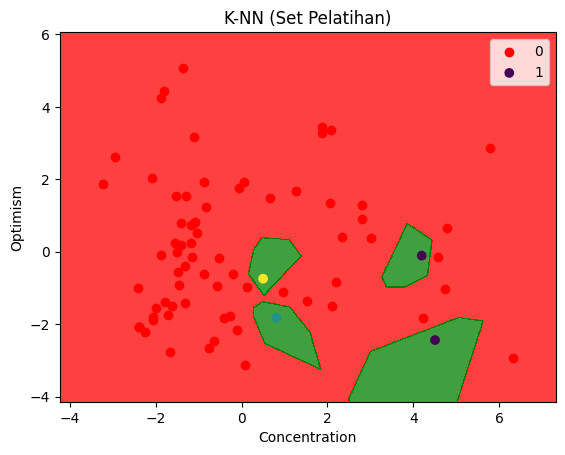

In [23]:
# Latih model KNN menggunakan data yang telah direduksi menjadi 2D
classifier.fit(X_train_2D, y_train)

# Visualisasi hasil set pelatihan
X_set, y_set = X_train_2D, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set Pelatihan)')
# Visualisasi hasil set pelatihan
plt.xlabel('Concentration')  # Fitur utama dari komponen 1
plt.ylabel('Optimism')  # Fitur utama dari komponen 2
plt.legend()
plt.show()

**Visualising the Test set results**

C:\Users\62895\AppData\Local\Temp\ipykernel_10664\2527860669.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


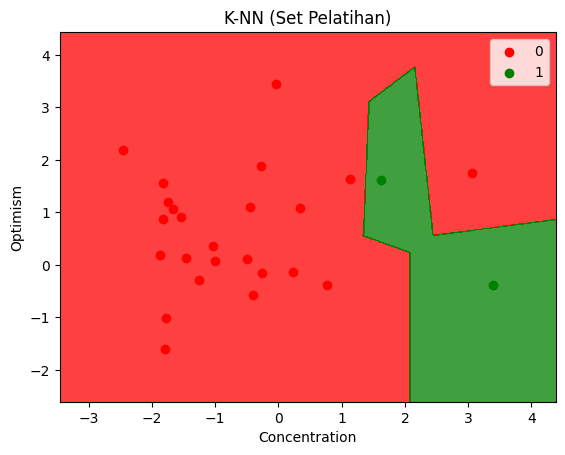

In [24]:
# Latih model KNN menggunakan data yang telah direduksi menjadi 2D
classifier.fit(X_test_2D, y_test)

# Visualisasi hasil set test
X_set, y_set = X_test_2D, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set Pelatihan)')
# Visualisasi hasil set test
plt.xlabel('Concentration')  # Fitur utama dari komponen 1
plt.ylabel('Optimism')  # Fitur utama dari komponen 2
plt.legend()
plt.show()